In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import StandardScaler


In [47]:
year = str(datetime.datetime.today().year)
month = str(datetime.datetime.today().month)
date = str(datetime.datetime.today().day)

In [48]:
metadata = pd.read_excel('/Users/suhancho/data/kaggle/dacon_brca/clinical_info.xlsx')
train = pd.read_table('/Users/suhancho/data/kaggle/dacon_brca/train.csv',sep=',')
test = pd.read_table('/Users/suhancho/data/kaggle/dacon_brca/test.csv',sep=',')

In [49]:
def annot_subtype(df):
    '''
    1 : Triple negative
    2 : Luminal A
    3 : Luminal B
    4 : HER2 Type
    5 : Other
    '''
    sub_lst=[]
    for i in range(len(df)):
        if (df.ER.tolist()[i]==0) & (df.PR.tolist()[i]==0) & (df.HER2.tolist()[i]==0):
            sub_lst.append('1')
        elif (df.ER.tolist()[i]==1) & (df.PR.tolist()[i]==1) & (df.HER2.tolist()[i]==0):
            sub_lst.append('2')
        elif (df.ER.tolist()[i]==1) & (df.PR.tolist()[i]==1) & (df.HER2.tolist()[i]==1):
            sub_lst.append('3')
        elif (df.ER.tolist()[i]==0) & (df.PR.tolist()[i]==0) & (df.HER2.tolist()[i]==1):
            sub_lst.append('4')
        else:
            sub_lst.append('5')
    df['Subtype'] = sub_lst

    return(df)


In [50]:
def fill_NaN(df):
    df['ER_Allred_score'].fillna(3,inplace=True)
    df['PR_Allred_score'].fillna(2.8,inplace = True)
    df["암의 장경"] = df["암의 장경"].fillna(0.1)
    return(df)

In [51]:
def remove_cols(df,rm_cols):
    df_out = df.loc[:,~df.columns.isin(rm_cols)]
    return(df_out)

In [52]:
def scale_columns(df,scale_cols):

    scaler = StandardScaler()
    df_noscale = df.loc[:,~df.columns.isin(scale_cols)]
    df_scale = df[scale_cols]
    scaler.fit(df_scale)
    df_scale = scaler.transform(df_scale)

    df_scale = pd.DataFrame(df_scale,columns=scale_cols)
    df_out = pd.concat([df_noscale,df_scale],axis=1)

    return(df_out)

In [53]:
def yield_output(train,test,outpath):
    # os.mkdir(outpath+'/'+year+month+date)
    outpath = outpath+'/'+year+month+date+'/'
    train.to_csv(outpath+'train_clean.csv',sep=',',index = False)
    test.to_csv(outpath+'test_clean.csv',sep=',',index = False)
    
    return(0)

In [55]:
# rm_cols = ['HER2_IHC','HER2_SISH','HER2_SISH_ratio','BRCA_mutation','수술연월일','DCIS_or_LCIS_type','img_path', 'img_path', 'mask_path','KI-67_LI_percent','HG','NG','HG_score_1','HG_score_2','HG_score_3']
rm_cols = ['HER2_IHC','HER2_SISH','HER2_SISH_ratio','BRCA_mutation','수술연월일','DCIS_or_LCIS_type','mask_path','KI-67_LI_percent','HG','NG','HG_score_1','HG_score_2','HG_score_3']
scale_cols = ['암의 장경','ER_Allred_score','PR_Allred_score']

In [56]:
train_ann = annot_subtype(train) ; test_ann = annot_subtype(test)
train_ann = fill_NaN(train_ann) ; test_ann = fill_NaN(test_ann)
train_ann = remove_cols(train_ann,rm_cols) ; test_ann = remove_cols(test_ann,rm_cols)
train_ann = scale_columns(train_ann,scale_cols) ; test_ann = scale_columns(test_ann,scale_cols)
train_ann.dropna(inplace = True) ; test_ann.dropna(inplace = True)
yield_output(train_ann,test_ann,'/Users/suhancho/data/kaggle/dacon_brca/')

0

Text(0.5, 1.0, 'Test set')

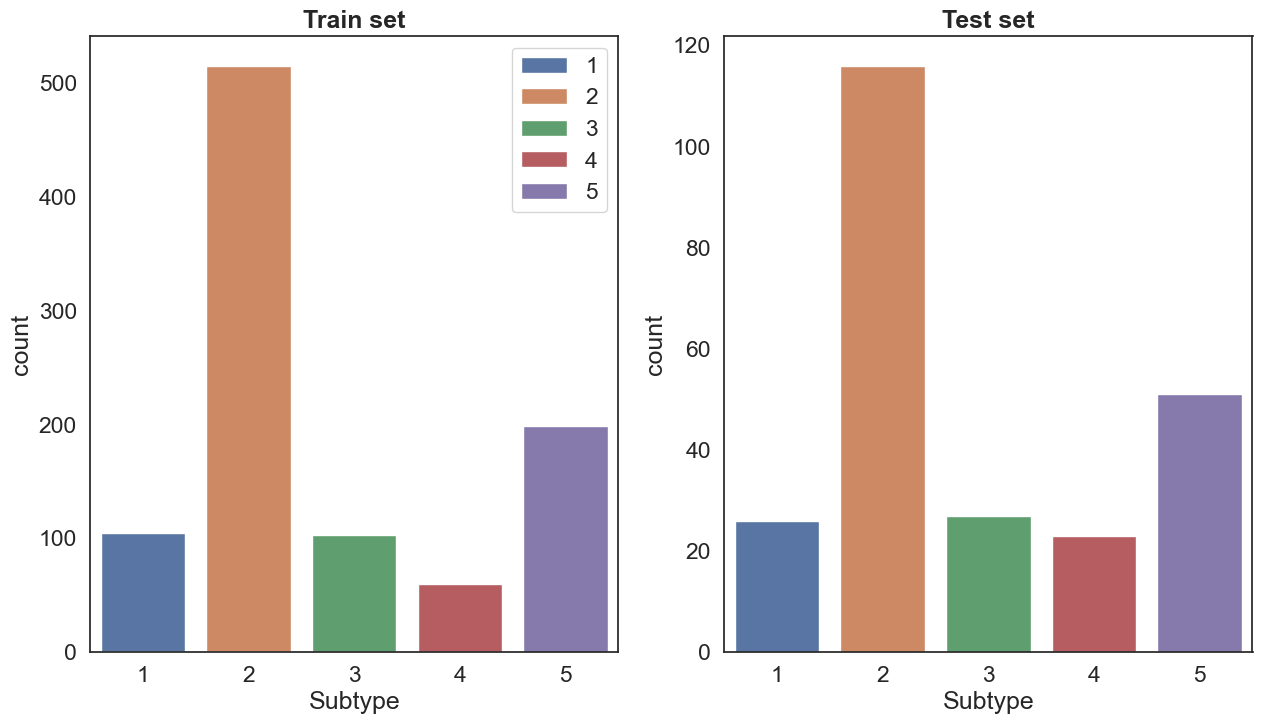

In [57]:
sns.set(font_scale = 1.5,style = 'white')
fig,axes = plt.subplots(1,2,figsize = (15,8))
sns.countplot(data = train_ann,x = 'Subtype',hue = 'Subtype',hue_order= ['1','2','3','4','5'],order= ['1','2','3','4','5'],ax = axes[0],dodge=False)
axes[0].set_title('Train set',weight = 'bold')
axes[0].legend(loc = 'upper right')
sns.countplot(data = test_ann,x = 'Subtype',hue_order= ['1','2','3','4','5'],order= ['1','2','3','4','5'],ax = axes[1],dodge=False)
axes[1].set_title('Test set',weight = 'bold')